<h2 style='color:blue' align="center"> Decision Tree Classification </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:/M60/ml_dataset/salaries_engineer.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [4]:
# rename col
df.rename(columns={'salary_more_then_100k':'salary'}, inplace=True)

In [5]:
df.head()

,company,job,degree,salary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
# Input Features - Idependent Variables
X = df.drop('salary', axis='columns')
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [7]:
df['company'].value_counts()

google        6
facebook      6
abc pharma    4
Name: company, dtype: int64

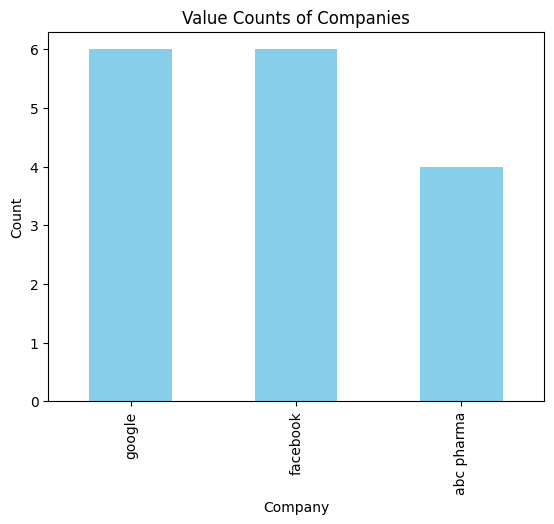

In [8]:
# plot
# dataframe
counts = df['company'].value_counts()

# Plotting the values
counts.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Value Counts of Companies')
plt.show()


In [9]:
y = df['salary']
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary, dtype: int64

### Label Encoding

**Label Encoding- Tasks**
- Lebel Encoder
- object creation
- fit it

In [10]:
from sklearn.preprocessing import LabelEncoder
en1 = LabelEncoder()
en2 = LabelEncoder()
en3 = LabelEncoder()

In [11]:
X['company_en'] = en1.fit_transform(X['company'])
X['job_en'] = en2.fit_transform(X['job'])
X['degree_en'] = en3.fit_transform(X['degree'])

In [12]:
X.head()

,company,job,degree,company_en,job_en,degree_en
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


**Encoded Values** Alphabetic Order
- Company :  0: abc pharma; 1: facebook; 2:google                             
- job     :  0: business manager, 1: Computer Programmer, 2:Sales Executive
- degree  :  0: bachelors, 1: Masters    ( Higher study get higher values)

In [13]:
# Encoded Features
inputs_en = X.drop(['company','job','degree'], axis='columns')
inputs_en

,company_en,job_en,degree_en
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


## Model

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(inputs_en, y)  # input & target

DecisionTreeClassifier()

In [16]:
model.score(inputs_en, y)

1.0

- Company : 0: abc pharma; 1: facebook; 2:google
- job : 0: business manager, 1: Computer Programmer, 2:Sales Executive
- degree : 0: bachelors, 1: Masters ( Higher study get higher values)

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [17]:
model.predict([[2,1,0]])  # Answer is No!

array([0], dtype=int64)

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

In [18]:
model.predict([[2,1,1]])  # Answer is Yes

array([1], dtype=int64)